In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [4]:
# FILEPATHS

# Path to the ResStock folder
ResStock_folder = os.path.join('NREL_ResStock', '2022_TMY3', 'MA_TMY3_metadata_and_annual_results')

# upgrade package to compare against baseline
upgrade = '04'      # "Heat pumps, high-efficiency, electric backup"

# Baseline and Upgrade files
baseline_file = 'MA_baseline_metadata_and_annual_results.csv'
upgrade_file = 'MA_upgrade' + upgrade + '_metadata_and_annual_results.csv'

# create dataframes from csv files
MA_baseline_df = pd.read_csv(os.path.join(ResStock_folder, baseline_file))
MA_upgrade_df = pd.read_csv(os.path.join(ResStock_folder, upgrade_file))

C:\Users\trent\AppData\Local\Temp\ipykernel_30760\2046483502.py:15: DtypeWarning:

Columns (121) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
MA_baseline_df.head()

,bldg_id,upgrade,weight,applicability,in.sqft,in.ahs_region,in.ashrae_iecc_climate_zone_2004,in.ashrae_iecc_climate_zone_2004_2_a_split,in.bathroom_spot_vent_hour,in.bedrooms,...,out.emissions.natural_gas.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.propane.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.electricity.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.fuel_oil.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.natural_gas.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.propane.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg
0,21,0,242.131013,True,1220.0,Non-CBSA New England,5A,5A,Hour21,4,...,4260.676139,0.0,1774.876553,0.0,4260.676139,0.0,5182.805387,5627.210243,5533.965713,6035.552692
1,117,0,242.131013,True,3301.0,Non-CBSA New England,5A,5A,Hour1,3,...,7029.432542,0.0,2527.575443,0.0,7029.432542,0.0,8342.290793,8994.927206,8828.448827,9557.007985
2,182,0,242.131013,True,853.0,"CBSA Boston-Cambridge-Newton, MA-NH",5A,5A,Hour5,1,...,7333.846546,0.0,1320.330278,0.0,7333.846546,0.0,8018.578248,8362.871639,8274.750889,8654.176824
3,281,0,242.131013,True,1690.0,"CBSA Boston-Cambridge-Newton, MA-NH",5A,5A,Hour0,3,...,9296.664561,0.0,3221.875676,0.0,9296.664561,0.0,11017.618054,11900.316063,11674.158083,12518.540237
4,352,0,242.131013,True,1220.0,"CBSA Boston-Cambridge-Newton, MA-NH",5A,5A,Hour0,3,...,3146.872817,0.0,1220.055520,0.0,3146.872817,0.0,3782.722683,4093.281050,4023.508111,4366.928337


In [6]:
MA_baseline_df.shape

(11689, 227)

In [7]:
MA_upgrade_df.shape

(11689, 299)

In [8]:
print(MA_upgrade_df.columns)

Index(['bldg_id', 'upgrade', 'weight', 'applicability', 'in.sqft',
       'in.ahs_region', 'in.ashrae_iecc_climate_zone_2004',
       'in.ashrae_iecc_climate_zone_2004_2_a_split',
       'in.bathroom_spot_vent_hour', 'in.bedrooms',
       ...
       'out.emissions_reduction.fuel_oil.lrmer_mid_case_15_2025_start.co2e_kg',
       'out.emissions_reduction.natural_gas.lrmer_mid_case_15_2025_start.co2e_kg',
       'out.emissions_reduction.propane.lrmer_mid_case_15_2025_start.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg',
       'out.emissions_reduction.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg',
       'upgrade.hvac_heating_efficiency', 'upgrade.hvac_heating_type',
       'upgrade.hvac_cooling_efficiency'],
      dtype='object', length=299)


In [9]:
MA_baseline_df['in.county'].unique()

array(['G2500050', 'G2500010', 'G2500250', 'G2500090', 'G2500210',
       'G2500130', 'G2500150', 'G2500270', 'G2500170', 'G2500230',
       'G2500030', 'G2500070', 'G2500110', 'G2500190'], dtype=object)

In [10]:
MA_EssexCounty_baseline_df = MA_baseline_df[MA_baseline_df['in.county'] == 'G2500090']

In [11]:
MA_EssexCounty_baseline_df.shape[0]

1272

In [12]:
MA_EssexCounty_baseline_df['in.city'].unique()

array(['Not in a census Place', 'In another census Place',
       'MA, Haverhill', 'MA, Lawrence', 'MA, Lynn', 'MA, Peabody',
       'MA, Beverly', 'MA, Salem', 'MA, Methuen Town'], dtype=object)

In [13]:
MA_Lawrence_df = MA_EssexCounty_baseline_df[MA_EssexCounty_baseline_df['in.city'] == 'MA, Lawrence']

In [14]:
MA_Lawrence_df.describe()

,bldg_id,upgrade,weight,in.sqft,in.bedrooms,in.geometry_stories,in.reeds_balancing_area,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,...,out.emissions.natural_gas.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.propane.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.electricity.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.fuel_oil.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.natural_gas.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.propane.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg
count,113.000000,113.0,113.000000,113.000000,113.000000,113.000000,113.0,113.0,113.0,113.0,...,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,263761.477876,0.0,242.131013,1601.318584,2.477876,2.044248,131.0,1.0,1.0,2007.0,...,4600.132875,306.244896,2741.106444,2418.827656,4600.132875,306.244896,8740.951236,9490.169648,9282.964266,10066.311870
std,151565.670347,0.0,0.000000,1515.130660,1.053034,1.198134,0.0,0.0,0.0,0.0,...,4546.780424,1686.540038,2389.572767,7108.329146,4546.780424,1686.540038,7036.398843,7157.720533,7123.360288,7320.472883
min,6879.000000,0.0,242.131013,333.000000,1.000000,1.000000,131.0,1.0,1.0,2007.0,...,0.000000,0.000000,175.736653,0.000000,0.000000,0.000000,1304.771153,1400.970837,1387.254204,1500.939874
25%,145230.000000,0.0,242.131013,853.000000,2.000000,1.000000,131.0,1.0,1.0,2007.0,...,378.065158,0.000000,1425.493401,0.000000,378.065158,0.000000,4426.583445,5167.613671,4842.719064,5689.093850
50%,271630.000000,0.0,242.131013,1202.000000,2.000000,2.000000,131.0,1.0,1.0,2007.0,...,3873.643460,0.000000,2143.432147,0.000000,3873.643460,0.000000,7043.421330,7688.741752,7486.702185,8282.121765
75%,386928.000000,0.0,242.131013,2152.000000,3.000000,2.000000,131.0,1.0,1.0,2007.0,...,7084.737245,0.000000,2951.263375,0.000000,7084.737245,0.000000,10411.946595,11219.543315,10981.940292,11851.386601
max,545331.000000,0.0,242.131013,12291.000000,5.000000,8.000000,131.0,1.0,1.0,2007.0,...,19393.604863,13754.620269,15895.697365,37204.560176,19393.604863,13754.620269,40806.673717,42526.948182,42112.777525,44250.543396


In [15]:
lawrenceMA_SFD = MA_Lawrence_df[MA_Lawrence_df['in.geometry_building_type_recs'] == 'Single-Family Detached']

In [16]:
lawrenceMA_SFD.shape

(47, 227)

In [17]:
lawrenceMA_SFD.describe()

,bldg_id,upgrade,weight,in.sqft,in.bedrooms,in.geometry_stories,in.reeds_balancing_area,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,...,out.emissions.natural_gas.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.propane.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.electricity.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.fuel_oil.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.natural_gas.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.propane.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg
count,47.000000,47.0,4.700000e+01,47.000000,47.000000,47.000000,47.0,47.0,47.0,47.0,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,258301.340426,0.0,2.421310e+02,2224.659574,3.276596,1.468085,131.0,1.0,1.0,2007.0,...,6041.950448,627.692992,2757.729379,5303.668876,6041.950448,627.692992,13399.442176,14117.119324,13934.655269,14731.041696
std,135164.707942,0.0,1.436449e-13,1410.072451,0.852162,0.545777,0.0,0.0,0.0,0.0,...,5793.572362,2505.830596,1514.702560,10258.891550,5793.572362,2505.830596,8496.796053,8684.317712,8634.336331,8866.440637
min,9563.000000,0.0,2.421310e+02,885.000000,2.000000,1.000000,131.0,1.0,1.0,2007.0,...,0.000000,0.000000,175.736653,0.000000,0.000000,0.000000,1910.519723,2814.689888,2568.655943,3576.066453
25%,199697.500000,0.0,2.421310e+02,1690.000000,3.000000,1.000000,131.0,1.0,1.0,2007.0,...,0.000000,0.000000,1771.421994,0.000000,0.000000,0.000000,7953.229649,8570.860978,8418.914338,9106.351264
50%,271630.000000,0.0,2.421310e+02,2176.000000,3.000000,1.000000,131.0,1.0,1.0,2007.0,...,5858.350936,0.000000,2484.565814,0.000000,5858.350936,0.000000,10949.774696,11457.447524,11353.116289,11974.088780
75%,351151.500000,0.0,2.421310e+02,2176.000000,4.000000,2.000000,131.0,1.0,1.0,2007.0,...,9711.211700,0.000000,3800.553853,7287.734119,9711.211700,0.000000,16292.465270,17386.159935,17139.891030,18210.508503
max,545331.000000,0.0,2.421310e+02,8194.000000,5.000000,3.000000,131.0,1.0,1.0,2007.0,...,19393.604863,13754.620269,7045.983220,37204.560176,19393.604863,13754.620269,40806.673717,42526.948182,42112.777525,44250.543396


In [18]:
lawrence_3bdrm = lawrenceMA_SFD[lawrenceMA_SFD['in.bedrooms'] == 3]

In [19]:
lawrence_3bdrm.describe()

,bldg_id,upgrade,weight,in.sqft,in.bedrooms,in.geometry_stories,in.reeds_balancing_area,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,...,out.emissions.natural_gas.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.propane.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.electricity.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.fuel_oil.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.natural_gas.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.propane.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg
count,25.000000,25.0,25.000000,25.000000,25.0,25.000000,25.0,25.0,25.0,25.0,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,243416.120000,0.0,242.131013,1906.600000,3.0,1.360000,131.0,1.0,1.0,2007.0,...,6804.621005,326.496042,2567.277204,2945.117834,6804.621005,326.496042,11408.152901,12083.252461,11910.248085,12643.512084
std,123268.887631,0.0,0.000000,623.067278,0.0,0.489898,0.0,0.0,0.0,0.0,...,5690.788500,1632.480210,1212.144663,6450.019386,5690.788500,1632.480210,5485.338577,5553.626334,5536.511385,5651.525342
min,13555.000000,0.0,242.131013,885.000000,3.0,1.000000,131.0,1.0,1.0,2007.0,...,0.000000,0.000000,364.965864,0.000000,0.000000,0.000000,2801.739372,4377.388177,3885.499003,5574.611672
25%,163058.000000,0.0,242.131013,1690.000000,3.0,1.000000,131.0,1.0,1.0,2007.0,...,258.085440,0.000000,2100.974994,0.000000,258.085440,0.000000,8008.012721,8637.931867,8498.024929,9213.318778
50%,249884.000000,0.0,242.131013,1690.000000,3.0,1.000000,131.0,1.0,1.0,2007.0,...,6723.576567,0.000000,2484.565814,0.000000,6723.576567,0.000000,10036.036908,10578.407283,10445.326911,10897.700932
75%,335004.000000,0.0,242.131013,2176.000000,3.0,2.000000,131.0,1.0,1.0,2007.0,...,8947.215185,0.000000,3126.214859,0.000000,8947.215185,0.000000,14013.191960,14336.031340,14215.178911,14917.709577
max,452587.000000,0.0,242.131013,3301.000000,3.0,2.000000,131.0,1.0,1.0,2007.0,...,19393.604863,8162.401048,5574.611672,24536.991258,19393.604863,8162.401048,27354.038012,28663.973314,28300.640836,29795.725286


In [20]:
EssexCounty_NatGas_df = MA_EssexCounty_baseline_df[MA_EssexCounty_baseline_df['in.heating_fuel'] == 'Natural Gas']

In [21]:
EssexCounty_NatGas_df.shape

(745, 227)

In [22]:
# get the 

In [23]:
EssexCounty_NatGas_df['in.hvac_heating_type_and_fuel'].value_counts()

Natural Gas Fuel Furnace               468
Natural Gas Shared Heating              99
Natural Gas Fuel Wall/Floor Furnace     97
Natural Gas Fuel Boiler                 81
Name: in.hvac_heating_type_and_fuel, dtype: int64

In [24]:
Essex_NG_Furnace = EssexCounty_NatGas_df[EssexCounty_NatGas_df['in.hvac_heating_type_and_fuel'] == 'Natural Gas Fuel Furnace']

In [25]:
Essex_NG_Furnace.shape

(468, 227)

In [26]:
Essex_NG_Furnace.describe()

,bldg_id,upgrade,weight,in.sqft,in.bedrooms,in.geometry_stories,in.reeds_balancing_area,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,...,out.emissions.natural_gas.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.propane.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.electricity.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.fuel_oil.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.natural_gas.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.propane.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg
count,468.000000,468.0,468.000000,468.000000,468.000000,468.000000,468.0,468.0,468.0,468.0,...,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,267773.743590,0.0,242.131013,1881.726496,2.694444,2.079060,131.0,1.0,1.0,2007.0,...,7711.730775,3.040338,2221.665523,24.173573,7711.730775,3.040338,8888.029739,9460.591074,9320.318661,9960.610209
std,158682.985511,0.0,0.000000,1779.008736,1.042261,1.946872,0.0,0.0,0.0,0.0,...,5763.509271,27.129945,1263.451925,180.176020,5763.509271,27.129945,6110.320548,6313.863380,6259.795114,6490.892011
min,281.000000,0.0,242.131013,333.000000,1.000000,1.000000,131.0,1.0,1.0,2007.0,...,196.831419,0.000000,-1476.964342,0.000000,196.831419,0.000000,422.212396,535.309303,506.806012,631.551625
25%,123113.500000,0.0,242.131013,1138.000000,2.000000,1.000000,131.0,1.0,1.0,2007.0,...,3432.867909,0.000000,1407.017450,0.000000,3432.867909,0.000000,4464.841240,4952.621660,4836.488406,5325.578348
50%,273659.000000,0.0,242.131013,1220.000000,3.000000,2.000000,131.0,1.0,1.0,2007.0,...,6330.892808,0.000000,2049.642853,0.000000,6330.892808,0.000000,7453.752328,7949.292467,7777.510232,8644.515760
75%,402801.000000,0.0,242.131013,2176.000000,3.000000,2.000000,131.0,1.0,1.0,2007.0,...,10386.989375,0.000000,2821.165146,0.000000,10386.989375,0.000000,11553.994887,12136.383676,11951.863434,12741.682169
max,547053.000000,0.0,242.131013,13414.000000,5.000000,21.000000,131.0,1.0,1.0,2007.0,...,36809.570579,297.456804,12065.570650,2328.942808,36809.570579,297.456804,39473.728582,40832.494463,40518.257009,41896.511940


In [27]:
Essex_NG_Furnace.dtypes

bldg_id                                                                    int64
upgrade                                                                    int64
weight                                                                   float64
applicability                                                               bool
in.sqft                                                                  float64
                                                                          ...   
out.emissions.propane.lrmer_mid_case_15_2025_start.co2e_kg               float64
out.emissions.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg    float64
out.emissions.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg          float64
out.emissions.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg          float64
out.emissions.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg             float64
Length: 227, dtype: object

In [28]:
# get subdataframe of Essex_NG_Furnace where in.geometry_building_type_recs == 'Single-Family Detached'
Essex_NG_Furnace_SFD = Essex_NG_Furnace[Essex_NG_Furnace['in.geometry_building_type_recs'] == 'Single-Family Detached']

In [29]:
Essex_NG_Furnace_SFD.shape

(249, 227)

In [30]:
# get subdataframe of Essex_NG_Furnace_SFD where in.sqft is between 1100 and 1300
Essex_NG_Furnace_SFD_1100_1300 = Essex_NG_Furnace_SFD[(Essex_NG_Furnace_SFD['in.sqft'] >= 1100) & (Essex_NG_Furnace_SFD['in.sqft'] <= 1300)]

In [31]:
Essex_NG_Furnace_SFD_1100_1300.shape

(55, 227)

In [32]:
# get subdataframe of Essex_NG_Furnace_SFD_1100_1300 where in.year_built is between 1950 and 1970
Essex_NG_Furnace_ducted_SFD_1100_1300 = Essex_NG_Furnace_SFD_1100_1300[Essex_NG_Furnace_SFD_1100_1300['in.hvac_heating_type'] == 'Ducted Heating']

In [33]:
# save Essex_NG_Furnace_ducted_SFD_1100_1300 to csv
# Essex_NG_Furnace_ducted_SFD_1100_1300.to_csv('Essex_NG_Furnace_ducted_SFD_1100_1300.csv')

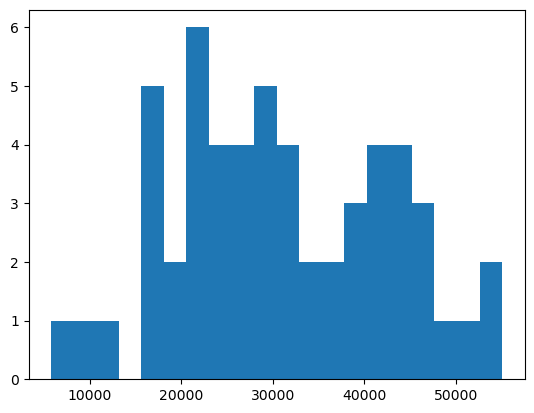

In [34]:
# create a histogram of the out.natural_gas.heating.energy_consumption.kwh column using matplotlib
plt.hist(Essex_NG_Furnace_ducted_SFD_1100_1300['out.natural_gas.heating.energy_consumption.kwh'], bins=20)
# plt.hist(Essex_NG_Furnace_ducted_SFD_1100_1300['out.natural_gas.heating.energy_consumption.kwh'])
# Essex_NG_Furnace_ducted_SFD_1100_1300['out.natural_gas.heating.energy_consumption.kwh'].hist()
plt.show()

<AxesSubplot: xlabel='out.natural_gas.heating.energy_consumption.kwh', ylabel='Count'>

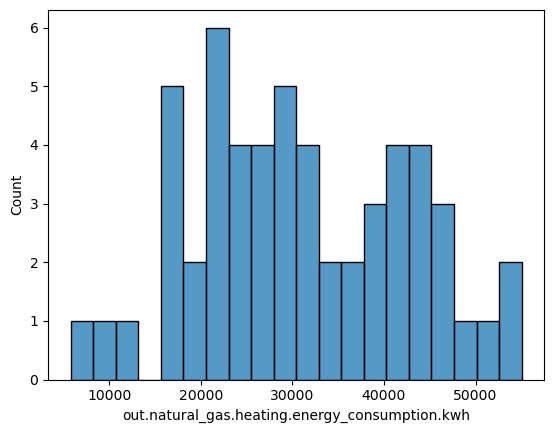

In [35]:
# now use seaborn
sns.histplot(Essex_NG_Furnace_ducted_SFD_1100_1300['out.natural_gas.heating.energy_consumption.kwh'], bins=20)

In [36]:
# get a subdataframe of Essex_NG_Furnace_ducted_SFD_1100_1300 where out.natural_gas.heating.energy_consumption.kwh is between 20000 and 40000
Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000 = Essex_NG_Furnace_ducted_SFD_1100_1300[(Essex_NG_Furnace_ducted_SFD_1100_1300['out.natural_gas.heating.energy_consumption.kwh'] >= 20000) & (Essex_NG_Furnace_ducted_SFD_1100_1300['out.natural_gas.heating.energy_consumption.kwh'] <= 40000)]

In [37]:
Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000.shape

(30, 227)

In [38]:
Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000.describe()

,bldg_id,upgrade,weight,in.sqft,in.bedrooms,in.geometry_stories,in.reeds_balancing_area,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,...,out.emissions.natural_gas.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.propane.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.electricity.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.fuel_oil.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.natural_gas.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.propane.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg
count,30.000000,30.0,30.000000,30.0,30.000000,30.000000,30.0,30.0,30.0,30.0,...,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,282035.133333,0.0,242.131013,1220.0,2.733333,1.200000,131.0,1.0,1.0,2007.0,...,7699.088345,16.150444,2269.195168,0.0,7699.088345,16.150444,8887.366499,9466.119761,9329.437774,9984.433956
std,159653.923494,0.0,0.000000,0.0,0.449776,0.406838,0.0,0.0,0.0,0.0,...,1355.560411,63.148861,662.306790,0.0,1355.560411,63.148861,1408.925271,1456.828565,1445.384760,1534.784146
min,19637.000000,0.0,242.131013,1220.0,2.000000,1.000000,131.0,1.0,1.0,2007.0,...,4985.103523,0.000000,791.676082,0.0,4985.103523,0.000000,5689.118344,6034.725793,5954.937534,6348.661608
25%,128509.250000,0.0,242.131013,1220.0,2.250000,1.000000,131.0,1.0,1.0,2007.0,...,6894.484729,0.000000,1770.164069,0.0,6894.484729,0.000000,8265.574148,8885.858312,8749.413759,9388.732700
50%,284531.500000,0.0,242.131013,1220.0,3.000000,1.000000,131.0,1.0,1.0,2007.0,...,7706.285798,0.000000,2161.164434,0.0,7706.285798,0.000000,8675.982824,9203.253336,9093.744798,9805.269975
75%,423090.750000,0.0,242.131013,1220.0,3.000000,1.000000,131.0,1.0,1.0,2007.0,...,8473.786767,0.000000,2773.057933,0.0,8473.786767,0.000000,9820.668982,10529.785130,10362.354887,11192.132842
max,543360.000000,0.0,242.131013,1220.0,3.000000,2.000000,131.0,1.0,1.0,2007.0,...,10209.308286,297.456804,3547.406219,0.0,10209.308286,297.456804,11268.813879,11778.535584,11673.461818,12490.774941


In [39]:
# create subdataframe of Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000 where in.geometry_stories == 1
Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000_1story = Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000[Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000['in.geometry_stories'] == 1]


In [40]:
Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000_1story.shape

(24, 227)

In [41]:
Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000_1story.describe()

,bldg_id,upgrade,weight,in.sqft,in.bedrooms,in.geometry_stories,in.reeds_balancing_area,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,...,out.emissions.natural_gas.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.propane.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.electricity.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.fuel_oil.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.natural_gas.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.propane.lrmer_mid_case_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_15_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_25_2025_start.co2e_kg,out.emissions.all_fuels.lrmer_mid_case_15_2025_start.co2e_kg
count,24.000,24.0,24.000000,24.0,24.000000,24.0,24.0,24.0,24.0,24.0,...,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,282638.250,0.0,242.131013,1220.0,2.750000,1.0,131.0,1.0,1.0,2007.0,...,7749.526324,20.188055,2205.595715,0.0,7749.526324,20.188055,8909.725114,9474.613403,9339.686891,9975.310093
std,163439.218,0.0,0.000000,0.0,0.442326,0.0,0.0,0.0,0.0,0.0,...,1333.451849,70.306566,655.836942,0.0,1333.451849,70.306566,1320.470633,1339.585224,1333.030550,1392.323902
min,19637.000,0.0,242.131013,1220.0,2.000000,1.0,131.0,1.0,1.0,2007.0,...,5525.148331,0.000000,791.676082,0.0,5525.148331,0.000000,6352.987519,6662.855518,6547.054293,6650.027018
25%,135260.250,0.0,242.131013,1220.0,2.750000,1.0,131.0,1.0,1.0,2007.0,...,6904.438020,0.000000,1747.010446,0.0,6904.438020,0.000000,8277.405198,8887.141298,8743.696227,9401.714286
50%,298058.000,0.0,242.131013,1220.0,3.000000,1.0,131.0,1.0,1.0,2007.0,...,7706.285798,0.000000,2053.575952,0.0,7706.285798,0.000000,8675.982824,9203.253336,9093.744798,9805.269975
75%,427618.250,0.0,242.131013,1220.0,3.000000,1.0,131.0,1.0,1.0,2007.0,...,8537.114726,0.000000,2708.147277,0.0,8537.114726,0.000000,9805.080827,10458.911775,10300.455858,11082.500700
max,543360.000,0.0,242.131013,1220.0,3.000000,1.0,131.0,1.0,1.0,2007.0,...,10209.308286,297.456804,3547.406219,0.0,10209.308286,297.456804,11268.813879,11778.535584,11673.461818,12266.708929


In [42]:
# get a list of bldg_id values
bldg_id_list = Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000_1story['bldg_id'].tolist()

In [43]:
bldg_id_list

[19637,
 23299,
 71673,
 92845,
 109587,
 110250,
 143597,
 197327,
 209579,
 229331,
 278451,
 279706,
 316410,
 316447,
 318872,
 319975,
 378922,
 427531,
 427880,
 455908,
 489482,
 489854,
 533395,
 543360]

In [44]:
# save Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000_1story to csv
Essex_NG_Furnace_ducted_SFD_1100_1300_2000_4000_1story.to_csv('EssexCounty_Subset_24bldgs.csv')

In [45]:
# read a parquet file into a dataframe
df = pd.read_parquet('NREL_ResStock/custom_bundle_01/upgrade_0/19637-0.parquet')

In [46]:
df

,timestamp,out.electricity.ceiling_fan.energy_consumption,out.electricity.ceiling_fan.energy_consumption_intensity,out.electricity.clothes_dryer.energy_consumption,out.electricity.clothes_dryer.energy_consumption_intensity,out.electricity.clothes_washer.energy_consumption,out.electricity.clothes_washer.energy_consumption_intensity,out.electricity.cooling_fans_pumps.energy_consumption,out.electricity.cooling_fans_pumps.energy_consumption_intensity,out.electricity.cooling.energy_consumption,...,out.zone_mean_air_temp.crawlspace_unvented.c,out.zone_mean_air_temp.crawlspace_vented.c,out.zone_mean_air_temp.furnace_airloop_ret_air_zone.c,out.zone_mean_air_temp.garage.c,out.zone_mean_air_temp.living_space.c,out.zone_mean_air_temp.mini_split_heat_pump_airloop_ret_air_zone.c,out.total.lrmer_95decarbby2035_15_2025start.co2e_kg,out.total.lrmer_lowrecost_15_2025start.co2e_kg,out.total.lrmer_lowrecost_25_2025start.co2e_kg,out.total.lrmer_midcase_15_2025start.co2e_kg
bldg_id,,,,,,,,,,,,,,,,,,,,,
19637,2007-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,10.470349,18.333333,0.0,0.254184,0.269946,0.264431,0.271430
19637,2007-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,10.653452,18.333333,0.0,0.262526,0.278433,0.272868,0.279930
19637,2007-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,10.494761,18.333333,0.0,0.267447,0.283432,0.277839,0.284938
19637,2007-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,10.390666,18.333333,0.0,0.275675,0.291801,0.286158,0.293320
19637,2007-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,10.413115,16.002712,0.0,0.013889,0.025723,0.021700,0.026644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19637,2007-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.463210,18.333333,0.0,0.675367,0.702401,0.693493,0.705096
19637,2007-12-31 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.453201,18.333333,0.0,0.637678,0.659623,0.652819,0.660766
19637,2007-12-31 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.444609,18.333333,0.0,0.630734,0.652561,0.645793,0.653695


In [47]:
# save df to csv
df.to_csv('bldg_19637_up0.csv')

In [48]:
# total natural gas heating energy consumption in kWh
df['out.natural_gas.heating.energy_consumption'].sum()

25221.70390404782

In [49]:
df_heating_gas = df[['timestamp', 'out.natural_gas.heating.energy_consumption', 'out.natural_gas.heating.energy_consumption_intensity']]

In [50]:
df_heating_gas['timestamp'] = pd.to_datetime(df_heating_gas['timestamp'])

C:\Users\trent\AppData\Local\Temp\ipykernel_30760\1680761777.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df_heating_gas.dtypes

timestamp                                               datetime64[ns]
out.natural_gas.heating.energy_consumption                     float64
out.natural_gas.heating.energy_consumption_intensity           float64
dtype: object

In [52]:
# make the timestamp column the index
df_heating_gas.set_index('timestamp', inplace=True)

In [53]:
df_heating_gas

,out.natural_gas.heating.energy_consumption,out.natural_gas.heating.energy_consumption_intensity
timestamp,,
2007-01-01 00:15:00,1.031024,0.000845
2007-01-01 00:30:00,1.067072,0.000875
2007-01-01 00:45:00,1.088173,0.000892
2007-01-01 01:00:00,1.123634,0.000921
2007-01-01 01:15:00,0.000000,0.000000
...,...,...
2007-12-31 23:00:00,2.799122,0.002294
2007-12-31 23:15:00,2.668705,0.002187
2007-12-31 23:30:00,2.639105,0.002163


In [54]:
# resample the data to hourly, by averaging the values in the first column and summing the values in the second column
df_heating_gas_hourly = df_heating_gas.resample('H').agg({'out.natural_gas.heating.energy_consumption': 'sum', 'out.natural_gas.heating.energy_consumption_intensity': 'mean'})

In [55]:
df_heating_gas_hourly

,out.natural_gas.heating.energy_consumption,out.natural_gas.heating.energy_consumption_intensity
timestamp,,
2007-01-01 00:00:00,3.186269,0.000871
2007-01-01 01:00:00,1.416706,0.000290
2007-01-01 02:00:00,0.729454,0.000149
2007-01-01 03:00:00,1.326440,0.000272
2007-01-01 04:00:00,1.846348,0.000378
...,...,...
2007-12-31 20:00:00,9.897303,0.002028
2007-12-31 21:00:00,10.648151,0.002182
2007-12-31 22:00:00,11.031195,0.002260


In [56]:
df_heating_gas_hourly.sum()

out.natural_gas.heating.energy_consumption              25221.703904
out.natural_gas.heating.energy_consumption_intensity        5.170207
dtype: float64

<AxesSubplot: xlabel='timestamp'>

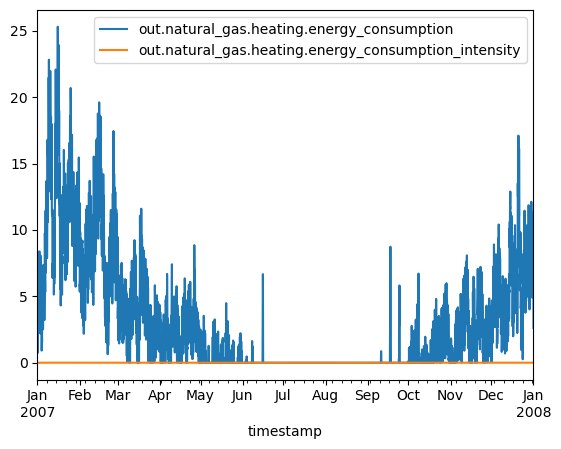

In [57]:
# plot the data
df_heating_gas_hourly.plot()

In [58]:
df_upgrade = pd.read_parquet('NREL_ResStock/custom_bundle_01/upgrade_4/19637-4.parquet')
df_upgrade.to_csv('bldg_19637_up4.csv')

In [59]:
df_upgrade_htg = df_upgrade[['timestamp', 
                             'out.electricity.heating.energy_consumption', 
                             'out.electricity.heating.energy_consumption_intensity',
                             'out.electricity.heating_fans_pumps.energy_consumption',
                             'out.electricity.heating_fans_pumps.energy_consumption_intensity',
                             'out.electricity.heating_hp_bkup.energy_consumption',
                             'out.electricity.heating_hp_bkup.energy_consumption_intensity']]

In [60]:
df_upgrade_htg

,timestamp,out.electricity.heating.energy_consumption,out.electricity.heating.energy_consumption_intensity
bldg_id,,,
19637,2007-01-01 00:15:00,0.190,0.000156
19637,2007-01-01 00:30:00,0.188,0.000154
19637,2007-01-01 00:45:00,0.178,0.000146
19637,2007-01-01 01:00:00,0.169,0.000139
19637,2007-01-01 01:15:00,0.000,0.000000
...,...,...,...
19637,2007-12-31 23:00:00,0.536,0.000439
19637,2007-12-31 23:15:00,0.536,0.000439
19637,2007-12-31 23:30:00,0.536,0.000439


In [61]:
df_upgrade_htg['timestamp'] = pd.to_datetime(df_upgrade_htg['timestamp'])

# make the timestamp column the index
df_upgrade_htg.set_index('timestamp', inplace=True)

# resample the data to hourly, by averaging the values in the first column and summing the values in the second column
df_upgrade_htg_hourly = df_upgrade_htg.resample('H').agg({'out.electricity.heating.energy_consumption': 'sum', 'out.electricity.heating.energy_consumption_intensity': 'mean'})


C:\Users\trent\AppData\Local\Temp\ipykernel_30760\2727725054.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df_upgrade_htg_hourly.sum()

out.electricity.heating.energy_consumption              4148.976000
out.electricity.heating.energy_consumption_intensity       0.850567
dtype: float64

<AxesSubplot: xlabel='timestamp'>

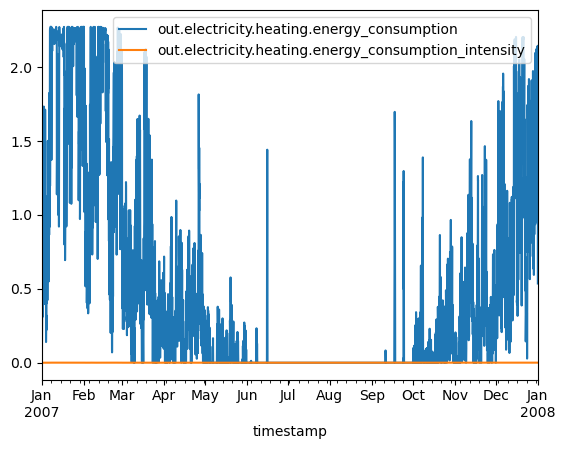

In [63]:
df_upgrade_htg_hourly.plot()

<AxesSubplot: xlabel='timestamp'>

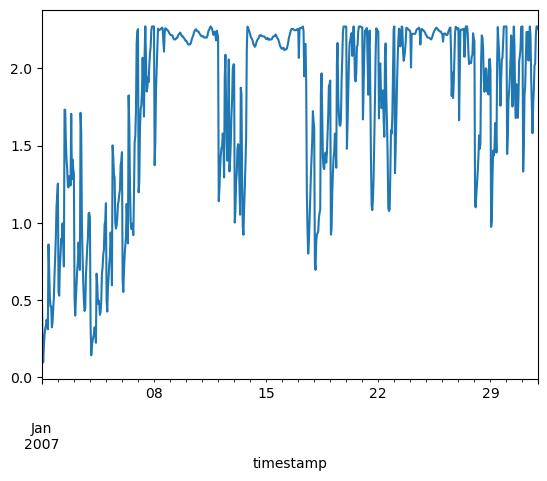

In [64]:
# plot df_upgrade_htg_hourly['out.electricity.heating.energy_consumption'] for rows where the month is January 2007
df_upgrade_htg_hourly['out.electricity.heating.energy_consumption'][(df_upgrade_htg_hourly.index.month == 1) & (df_upgrade_htg_hourly.index.year == 2007)].plot()


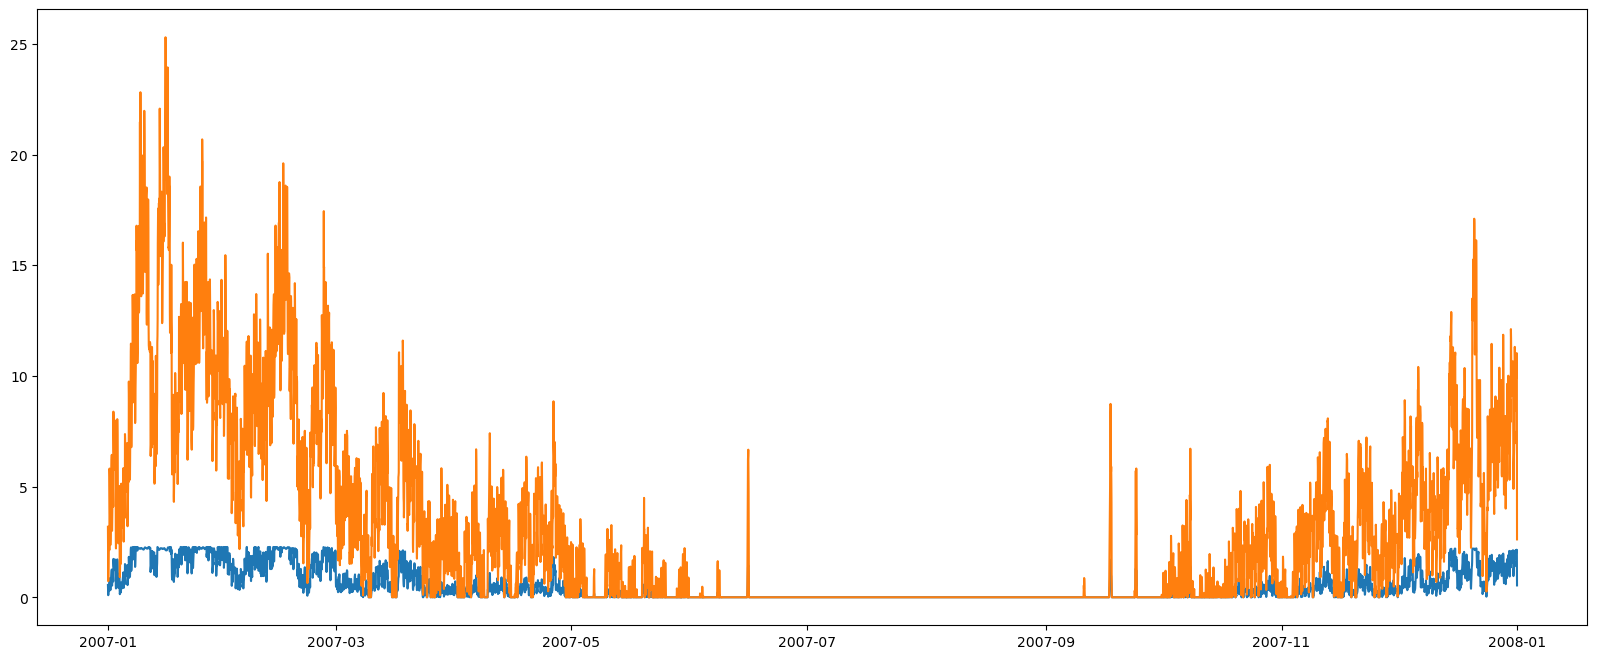

In [65]:
plt.figure(figsize=(20,8))
plt.plot(df_upgrade_htg_hourly['out.electricity.heating.energy_consumption'])
plt.plot(df_heating_gas_hourly['out.natural_gas.heating.energy_consumption'])

In [66]:
if not os.path.exists("plotly_exports"):
    os.mkdir("plotly_exports")

In [67]:
# create the same plot using plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_upgrade_htg_hourly.index, y=df_upgrade_htg_hourly['out.electricity.heating.energy_consumption'], name='Upgrade'))
fig.add_trace(go.Scatter(x=df_heating_gas_hourly.index, y=df_heating_gas_hourly['out.natural_gas.heating.energy_consumption'], name='Baseline'))
fig.update_layout(title='Heating Energy Consumption', xaxis_title='Date', yaxis_title='Energy Consumption (kWh)')
fig.show()

In [68]:
# # save the plotly figure as an svg file
# import plotly
# plotly.io.write_image(fig, 'plotly_exports/Heating_Energy_Consumption.svg', format='svg')

In [66]:
# # save the plotly figure as an svg file
# fig.write_image('plotly_exports/heating_energy_consumption_annual_test.svg')
